# Fitting continuous functions with artificial neural networks

In nature we often observe some input 'x' being turned into an output 'y'.  For example, molecular coordinates **R** can be turned into a ground state energy E. We can represent that as a function, *f*.  So E = f(**R**), or in the general case y = f(x).  

Using machine learning we can take observations of x and y, called the data, and approximate (the often unknown) f with another function.  A powerful class of functions are  *artificial neural networks* (ANN). 

In this workbook we will take observations of a quadratic function and use those data to train a ANN so that when given a particular value of x it will produce the same result as the quadratic function. 

## 1. The raw data

Below we generate the raw data that the neural network will be trained with. 

In [1]:
import numpy as np

# Generating data
x = np.linspace(-10.0,10.0,2000)
y = x**2 


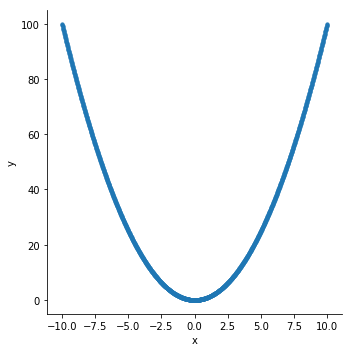

In [2]:
# Visualising the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['x'] = x
df['y'] = y
lm = sns.lmplot('x', 'y', data=df,
                scatter_kws={"s": 10, "alpha": 0.6}, line_kws={"alpha": 0.5}, fit_reg=False)
plt.show()

## 2. Feature extraction

In this case we will simply use x as a feature so there is no need to do any additional work. 

## 3. Hyper-parameters

Once the data is ready to be used, one can start training the neural network. However, in addition to the weights and biases in the network, there are other variables that make a difference to the quality of the model. These are the network structure (the number of hidden layers and the number of neurons in each layer), the learning rate, the regularisation parameter... These are referred to as 'hyper-parameters' and they also need to be optimised. 

This can be done in a variety of ways, like by manually adjusting them (extremely tedious and inefficient) or with grid search, random search and Gaussian processes. Here we will use grid search, even though for real applications it is not recommended.

In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data set into training and test set
x_col = np.reshape(x, (len(x),1))
x_train, x_test, y_train, y_test = train_test_split(x_col, y, test_size=0.2, random_state=0)

In [4]:
from sklearn import neural_network

# Creating the neural network
nn_regression = neural_network.MLPRegressor(tol=0.00001, max_iter=20000)

In Scikit learn, in order to do a grid search, one has to create a 'pipeline'. This is a collection of all the operations required to go from raw data to having a fitted model. In our simple example, the only step needed in the pipeline is the neural network regression, as no preprocessing of the data was needed.

The hyper-parameters that we will optimise here are the learning rate and the structure of the neural network. In scikit learn, the notation `(4, 3, 2)` means that the neural network has 3 hidden layers, the first one has 4 neurons, the second has 3 and the third has 2. 

We will ask sklearn to iterate over combinations of different values of the network structure and learning rate and the record how well the network behaves.  'How well' in this case is the mean square error between the neural network predictions and the true values. 

In [5]:
from sklearn.pipeline import Pipeline

# Creating the pipeline
pipe = Pipeline(steps=[("NN", nn_regression)])
pipe.set_params(NN__activation="tanh")
param = {
         "NN__learning_rate_init":[0.001, 0.01, 0.1], 
         "NN__hidden_layer_sizes":[(4,3,2), (6, 5, 3)]
        }

In [ ]:
from sklearn.model_selection import GridSearchCV

# Doing the grid search
grid_search = GridSearchCV(pipe, param_grid=param)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

/Users/walfits/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## 4. Fitting the model on the training data

The output from the above cell tells us what hyper-parameters give the highest scoring model. So, we keep these hyper-parameters and train a neural network with them. This will then be used for predictions.

In [7]:
# Fitting the pipe using the best hyper-parameters
pipe.set_params(
    NN__learning_rate_init=grid_search.best_params_["NN__learning_rate_init"], 
    NN__hidden_layer_sizes=grid_search.best_params_["NN__hidden_layer_sizes"]
)

pipe.fit(x_train, y_train)

Pipeline(steps=[('NN', MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 5, 3), learning_rate='constant',
       learning_rate_init=0.01, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-05, validation_fraction=0.1,
       verbose=False, warm_start=False))])

## 5. Evaluating model on test data

Now we can see how how good is our fit by testing the model on data it hasn't seen yet. 

In [8]:
# Calculating predictions
y_predict = pipe.predict(x_test)

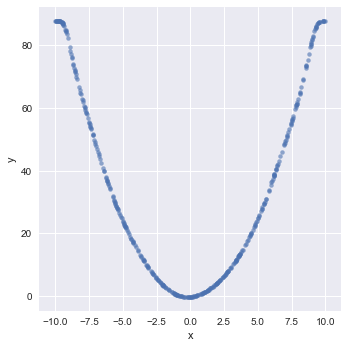

In [9]:
# Visualising the results

df = pd.DataFrame()
df['x'] = np.reshape(x_test, (len(x_test),))
df['y'] = y_predict
lm = sns.lmplot('x', 'y', data=df,
                scatter_kws={"s": 20, "alpha": 0.6}, line_kws={"alpha": 0.5}, fit_reg=False)
plt.show()

## Additional exercises

To get a feel of how the performance of the model changes, you can try playing around with the other hyper-parameters. For example, you can try the following things:

1. Change the regularisation parameter (`NN__alpha`) 
2. Change the batch size (`NN__batch_size`)
3. Change the activation function from a tanh to something else. 

You can get the description of all the parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html).

If you are feeling adventurous, you could try fitting a Morse potential. The functional form is:

\begin{equation}
V(r) = A (1 - e^{-B(r-C)})^2
\end{equation}

And you could try using `A = 1`, `B = -0.1` and `C = 0`.


